# Multiple dispatch

**Multiple dispatch** is a key feature of Julia, that we will explore in this notebook.

It helps make software fast. It also makes software extensible, programmable, and downright fun to play with. 

The Julia experience is that it is more powerful than we even realized at first.

## 1. Roman numerals (for fun)

Let's define a **new type** to represent a Roman numeral.

(Roman numbers are a base-10 system!)

In [1]:
struct Roman
    n::Int # we hold the number as a decimal integer
end

But Roman values look like this! :(

In [2]:
Roman(55)

Roman(55)

In [3]:
num_map = [1000=>"M", 900=>"CM", 500=>"D", 400=>"CD", 100=>"C", 90=>"XC",
                 50=>"L", 40=>"XL", 10=>"X", 9=>"IX", 5=>"V", 4=>"IV", 1=>"I"]

13-element Array{Pair{Int64,String},1}:
 1000 => "M" 
  900 => "CM"
  500 => "D" 
  400 => "CD"
  100 => "C" 
   90 => "XC"
   50 => "L" 
   40 => "XL"
   10 => "X" 
    9 => "IX"
    5 => "V" 
    4 => "IV"
    1 => "I" 

In [4]:
num_map[1]

1000 => "M"

In [5]:
dump(num_map[1])

Pair{Int64,String}
  first: Int64 1000
  second: String "M"


In [6]:
x = 100
if x > 0
    println("positive")
end

positive


short if (common in Julia)

In [7]:
x = 100
x>0 && println("positive")

positive


But you can make it look like Roman numerals! :)

In [8]:
# this function uses recursion to turn a number to a string roman numeral
function romanstr(n, i=1)
    n == 0 && return ""  ## short if
    n ≥ 5000 && return(string(n)) ## too large for the romans  
    if n >= first(num_map[i])
        string(last(num_map[i]), romanstr(n-first(num_map[i]), i))
    else
        romanstr(n, i+1)
    end
end

romanstr (generic function with 2 methods)

In [9]:
# you can use romanstr to display Roman values in Roman numerals everywhere!!
Base.show(io::IO, r::Roman) = print(io, romanstr(r.n))  # Base.show method defines how Julia "shows" *any and all* types!

We can create an object of this type as follows:

In [11]:
Roman(2019) # now this should print differently

MMXIX

In [12]:
Roman(90)

XC

In [13]:
typeof.([5 5.0 Roman(5) "Five" '5'  5//1])

1×6 Array{DataType,2}:
 Int64  Float64  Roman  String  Char  Rational{Int64}

In [14]:
x = [7 1 2 5 8 9]
Roman.(x)   # equivalent to map(Roman, x)  or  [Roman(w) for w in x]

1×6 Array{Roman,2}:
 VII  I  II  V  VIII  IX

In [15]:
Roman(4) + Roman(5)

MethodError: MethodError: no method matching +(::Roman, ::Roman)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

In [16]:
typeof(Roman(4).n)

Int64

In [17]:
import Base: +, *

+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 162 methods)

In [18]:
Roman(14) + Roman(5)

XIX

This **adds a new method** to the function `+`:

In [19]:
methods(+) # look for the + method on Roman below!

# 162 methods for generic function "+":
[1] +(x::Bool, z::Complex{Bool}) in Base at complex.jl:278
[2] +(x::Bool, y::Bool) in Base at bool.jl:96
[3] +(x::Bool) in Base at bool.jl:93
[4] +(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:104
[5] +(x::Bool, z::Complex) in Base at complex.jl:285
[6] +(a::Float16, b::Float16) in Base at float.jl:392
[7] +(x::Float32, y::Float32) in Base at float.jl:394
[8] +(x::Float64, y::Float64) in Base at float.jl:395
[9] +(z::Complex{Bool}, x::Bool) in Base at complex.jl:279
[10] +(z::Complex{Bool}, x::Real) in Base at complex.jl:293
[11] +(::Missing, ::Missing) in Base at missing.jl:93
[12] +(::Missing) in Base at missing.jl:79
[13] +(::Missing, ::Number) in Base at missing.jl:94
[14] +(level::Base.CoreLogging.LogLevel, inc::Integer) in Base.CoreLogging at logging.jl:106
[15] +(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:413
[16] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:455
[17] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:454
[18] +(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:453
[19] +(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:424
[20] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:461
[21] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:467
[22] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:563
[23] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:556
[24] +(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:550
[25] +(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:409
[26] +(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:378
[27] +(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:385
[28] +(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:393
[29] +(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:401
[30] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/periods.jl:343
[31] +(x::Dates.CompoundPeriod, y::Dates.Period) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/periods.jl:341
[32] +(x::Dates.CompoundPeriod, y::Dates.TimeType) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/periods.jl:371
[33] +(x::Dates.Date, y::Dates.Day) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:74
[34] +(x::Dates.Date, y::Dates.Week) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:72
[35] +(dt::Dates.Date, z::Dates.Month) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:55
[36] +(dt::Dates.Date, y::Dates.Year) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:28
[37] +(dt::Dates.Date, t::Dates.Time) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:19
[38] +(t::Dates.Time, dt::Dates.Date) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:20
[39] +(x::Dates.Time, y::Dates.TimePeriod) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:78
[40] +(dt::Dates.DateTime, z::Dates.Month) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:48
[41] +(dt::Dates.DateTime, y::Dates.Year) in Dates at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/Dates/src/arithmetic.jl:24
[42] +(x::Dates.DateTime, y::Dates.Period) in Dates at /Users/sabae/buildbot/worker/package_macos64/bu

In [20]:
Roman(3) * Roman(2)

MethodError: MethodError: no method matching *(::Roman, ::Roman)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

In [21]:
import Base.*
*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 355 methods)

In [22]:
Roman(3) * Roman(2)

VI

In [23]:
Roman(3)^2

MethodError: MethodError: no method matching ^(::Roman, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:796
  ^(!Matched::Missing, ::Integer) at missing.jl:130
  ^(!Matched::Missing, ::Number) at missing.jl:94
  ...

In [24]:
import Base:^
^(a,n) = prod(fill(a,n))

^ (generic function with 65 methods)

In [25]:
Roman(3)^2

IX

In [26]:
prod(fill(3,5)), 3^5

(243, 243)

In [27]:
Roman(3)^2, 3^2

(IX, 9)

In [28]:
*(i::Roman, j::Roman) = Roman(i.n + j.n)

* (generic function with 355 methods)

In [29]:
Roman(3)^2

VI

In [30]:
*(i::Roman, j::Roman) = Roman(i.n * j.n)

* (generic function with 355 methods)

In [31]:
Roman(3)^2

IX

But 

In [32]:
Roman(3) * 2

MethodError: MethodError: no method matching *(::Roman, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(!Matched::Complex{Bool}, ::Real) at complex.jl:301
  *(!Matched::Missing, ::Number) at missing.jl:94
  ...

In [33]:
# Complicated mytimes to decide what to do based on type
# not suggested, better way coming soon
function mytimes(i,j)
  if isa(i,Roman) & isa(j,Number)
        return  fill('♡', i.n, j)   # i by j matrix with 
    elseif    isa(i,Number) & isa(j,Roman) 
        return  "😄"^(i*j.n)   #  i * j happy faces
    else
        return("I Don't know")
    end
end

mytimes (generic function with 1 method)

In [34]:
mytimes(3,Roman(4)) # Twelve happys

"😄😄😄😄😄😄😄😄😄😄😄😄"

In [35]:
mytimes(Roman(4),3) # 4x3 matrix with heartsuits

4×3 Array{Char,2}:
 '♡'  '♡'  '♡'
 '♡'  '♡'  '♡'
 '♡'  '♡'  '♡'
 '♡'  '♡'  '♡'

The simplest thing to do is to explicitly define multiplication of a `Roman` by a number. We can do it as we see fit:

In [36]:
*(i::Number, j::Roman) =  "😄"^(i*j.n)      #  i * j happy faces

*(i::Roman, j::Number) =   fill('♡', i.n, j)       # i by j matrix

* (generic function with 357 methods)

In [37]:
3 * Roman(3) # Nine happys

"😄😄😄😄😄😄😄😄😄"

In [38]:
Roman(3) * 5  # Three by Five matrix of ones

3×5 Array{Char,2}:
 '♡'  '♡'  '♡'  '♡'  '♡'
 '♡'  '♡'  '♡'  '♡'  '♡'
 '♡'  '♡'  '♡'  '♡'  '♡'

In [39]:
t(x::Roman,y::Roman) = x.n * y.n

t (generic function with 1 method)

In [40]:
t(Roman(5),Roman(4))

20

In [41]:
#  Notice how tight the assembler is!
@code_native t(Roman(5),Roman(4))

	.section	__TEXT,__text,regular,pure_instructions
; ┌ @ In[39]:1 within `t'
; │┌ @ In[39]:1 within `*'
	movq	(%rsi), %rax
	imulq	(%rdi), %rax
; │└
	retq
	nopl	(%rax,%rax)
; └


## Functions

In [42]:
import Base: *, +, ^

In [43]:
ζ(n) =  sum( (1:10000.0).^(-n))

ζ (generic function with 1 method)

In [44]:
ζ₁ = n ->  sum( (1:10000.0).^(-n))

#3 (generic function with 1 method)

In [45]:
ζ₁(2), π^2/6

(1.644834071848061, 1.6449340668482264)

In [46]:
(x->sin(x))(2.1),  sin(2.1)

(0.8632093666488737, 0.8632093666488737)

In [47]:
x->sin(x)

#7 (generic function with 1 method)

In [48]:
*(α::Number,   g::Function) = x -> α * g(x)   # Scalar times function

*(f::Function, λ::Number)   = x -> f(λ * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # Function composition  -- abuse of notation!  use \circ in Julia 0.6

^(f::Function, n) = prod(fill(f,n))


^ (generic function with 66 methods)

In [49]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 163 methods)

For example, the exponential function is defined as

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

We can think of this just in terms of functions:

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

where $\mathrm{pow}_n(x) = x^n$.

(starts to blur the symbolic with the numerical!)

In [50]:
pow(n) = x -> x^n

myexp = sum(1/factorial(big(n)) * pow(n) for n in 0:100)   # taylor series not efficient!

#15 (generic function with 1 method)

In [51]:
[myexp(1); exp(1); exp(big(1))]

3-element Array{BigFloat,1}:
 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
 2.718281828459045090795598298427648842334747314453125                           
 2.718281828459045235360287471352662497757247093699959574966967627724076630353555

In [52]:
f = x -> x^2
f(10)

100

In [53]:
g = 3f
g(10)

300

In [54]:
(f^2)(10)  # since we defined multiplication of functions as composition

10000

In [55]:
using Plots;
gr()

Plots.GRBackend()

In [ ]:
x = pi*(0:0.001:4)

plot(x, sin.(x),    c="black", label="Fun")
plot!(x, (12*sin).(x),    c="green", label="Num * Fun")
plot!(x, (sin*12).(x),    c="red", alpha=0.9, label="Fun * Num")
plot!(x, (5*sin*exp).(x), c="blue", alpha=0.2, label="Num * Fun * Fun")

In [ ]:
plot([12*sin, sin*12, 5*sin*exp], 0:.01:4π, α=[1 .9 .2], c=[:green :red :blue])

<img src="https://lh4.googleusercontent.com/--z5eKJbB7sg/UffjL1iAd4I/AAAAAAAABOc/S_wDVyDOBfQ/gauss.jpg">

###  "Sin^2 phi is odious to me, even though Laplace made use of it; should  it be feared that sin^2 phi might become ambiguous, which would perhaps  never occur, or at most very rarely when speaking of sin(phi^2), well  then, let us write (sin phi)^2, but not sin^2 phi, which by analogy  should signify sin(sin phi)." -- Gauss

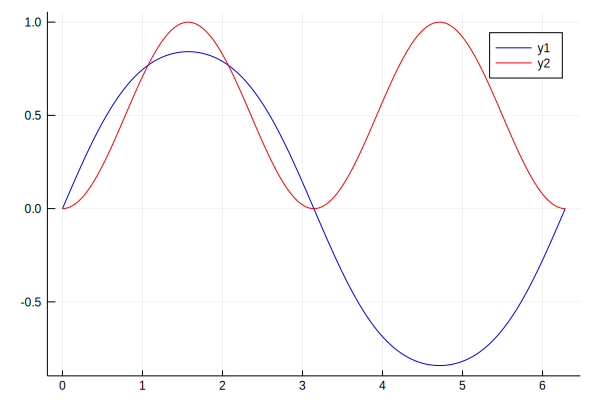

In [61]:
x=(0:.01:2) * pi;

plot(x, (sin^2).(x), c="blue")     # Squaring just works, y=sin(sin(x)), Gauss would be pleased!
plot!(x, sin.(x).^2,  c="red")         

In [62]:
(sin^2)(1), sin(sin(1))

(0.7456241416655579, 0.7456241416655579)

In [63]:
h(a, b::Any) = "fallback"
h(a::Number, b::Number) = "a and b are both numbers"
h(a::Number, b) = "a is a number"
h(a, b::Number) = "b is a number"
h(a::Integer, b::Integer) = "a and b are both integers"

h (generic function with 5 methods)

In [ ]:
# Exercise : Try playing with h